In [1]:
import numpy as np
from thinkdsp import Chirp

In [2]:
class TromboneGliss(Chirp):


    def evaluate(self, ts):
        lengths = np.linspace(1.0 / self.start, 1.0 / self.end, len(ts))
        freqs = 1 / lengths
        dts = np.diff(ts, prepend=0)
        dphis = np.pi * 2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [3]:
signal1 = TromboneGliss(262, 349)
wave1 = signal1.make_wave(duration=1)
wave1.make_audio()

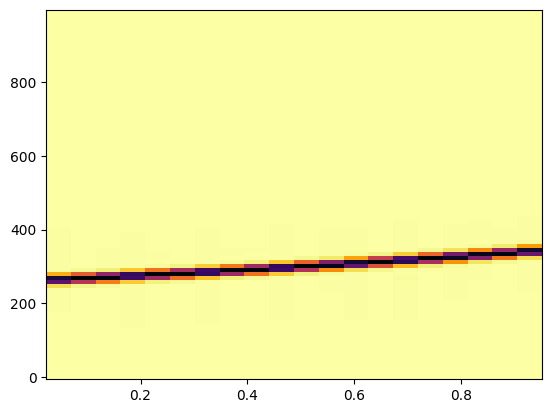

In [4]:
sp = wave1.make_spectrogram(1024)
sp.plot(high=1000)

In [5]:
signal2 = TromboneGliss(349, 262)
wave2 = signal2.make_wave(duration=1)
wave2.make_audio()

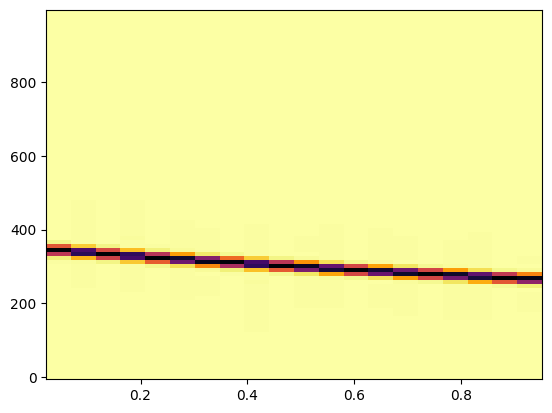

In [6]:
sp2 = wave2.make_spectrogram(1024)
sp2.plot(high=1000)

In [7]:
result = wave1 | wave2
result.make_audio()

В результате получили сигнал, который сначала возрастает, а потом убывает